# EXERCISE 2: MATRIX CALCULATION

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import time as time
import pandas as pd
import random, sys

In [78]:
def simple_matrix_product(x,y,z,N):
    for i in range(N):
        for j in range(N):
            for k in range(N):
                z[i,j] = z[i,j] + x[i,k]*y[k,j]
    return z

In [79]:
def block_matrix_product(a,b,c,n,nb):
    for ii in range(0, n, nb):
        for jj in range(0, n, nb):
            for kk in range(0, n, nb):
                for i in range(ii, min(ii+nb, n)):
                    for j in range(jj, min(jj+nb, n)):
                        for k in range(kk, min(kk+nb, n)):
                            c[i][j] +=a[i][k] *b[k][j]
    return c

In [80]:
N = 5
Nb = 1
x = np.zeros((N,N))
y = np.zeros((N,N))
z = np.zeros((N,N))

x = np.random.rand(N,N)+1.0
y = np.random.rand(N,N)+1.0


In [81]:
A = simple_matrix_product(x,y,z,N)
B = block_matrix_product(x,y,z,N,Nb)

In [83]:
(A==B).all()

True

In [138]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
N = 300
n_blocks = [1, 2, 4, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300]

times = []
bandwidths = []

for index, Nb in enumerate(n_blocks):
    x = np.random.rand(N, N)+3
    y = np.random.rand(N, N)+9
    z = np.zeros((N,N))
    start = time.time()
    z = block_matrix_product(x,y,z,N,Nb)
    end = time.time()
    times.append((end-start)*1000)
    bandwidths.append((sys.getsizeof(x)*2000)/(times[index]*1024*1024))
    print("En cours...")

En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...
En cours...


In [139]:
data = pd.DataFrame({"Block_size":n_blocks, "Durations": times, "Bandwidths": bandwidths})
data

,Block_size,Durations,Bandwidths
0,1,73129.225492,0.018782
1,2,44103.381157,0.031144
2,4,34034.802914,0.040357
3,8,31593.828201,0.043475
4,10,31104.039431,0.044159
5,15,30068.909168,0.045680
6,20,32242.376566,0.042600
7,25,29452.083349,0.046636
8,30,30150.430918,0.045556
9,40,28822.982550,0.047654


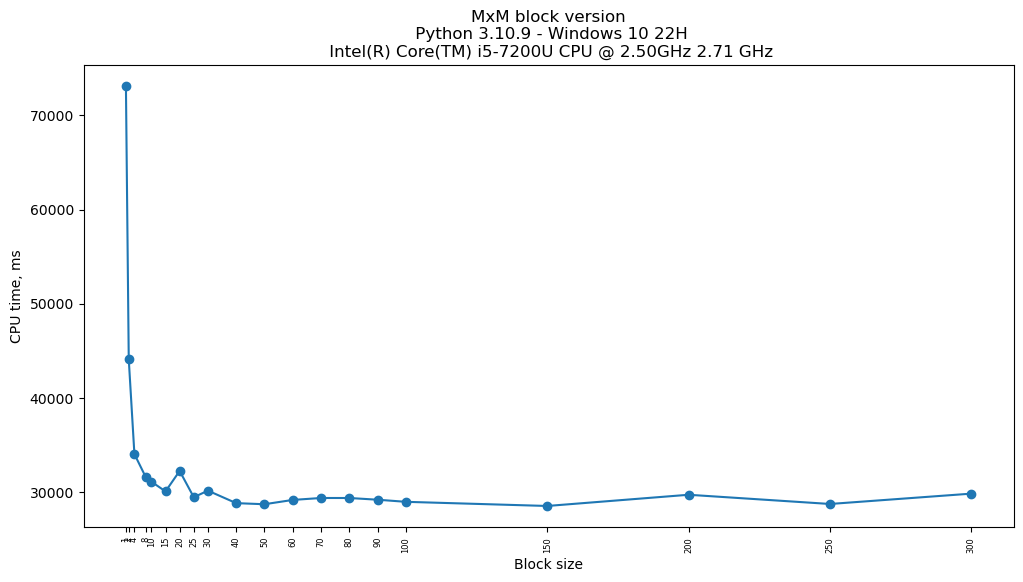

In [141]:
plt.figure(figsize=(12, 6))
data.set_index("Block_size")["Durations"].plot(marker="o")
plt.xlabel("Block size")
plt.ylabel("CPU time, ms")
plt.title("MxM block version\n Python 3.10.9 - Windows 10 22H\n Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz 2.71 GHz")
plt.xticks(labels=n_blocks, ticks=n_blocks, rotation=90, size=6)
plt.show()

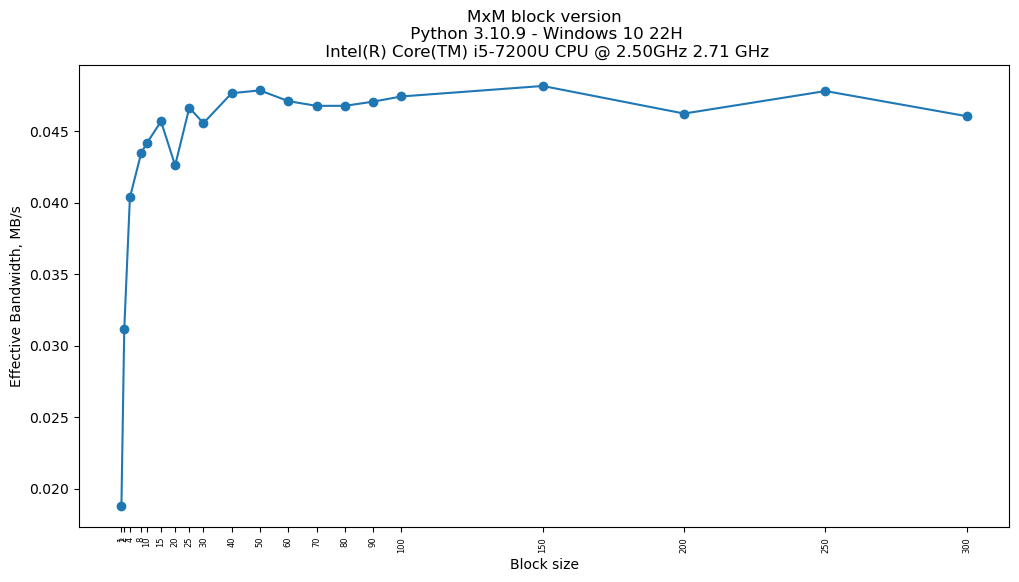

In [142]:
plt.figure(figsize=(12, 6))
data.set_index("Block_size")["Bandwidths"].plot(marker="o")
plt.xlabel("Block size")
plt.ylabel("Effective Bandwidth, MB/s")
plt.title("MxM block version\n Python 3.10.9 - Windows 10 22H\n Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz 2.71 GHz")
plt.xticks(labels=n_blocks, ticks=n_blocks, rotation=90, size=6)
plt.show()

In [ ]:
data.loc[data.Durations==data.Durations.min()]